In [1]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/test/
   creating: data/test/fox/
  inflating: data/test/fox/06dcda7babea0933_jpg.rf.6a0e2e6df773e525e472f2933529b6a0.jpg  
  inflating: data/test/fox/09ce2931e9b28e5a_jpg.rf.097327868e921361cc30796f74609ffb.jpg  
  inflating: data/test/fox/0c0f86df062d0f8a_jpg.rf.2404ea8f631b23746b294905fcc7cf21.jpg  
  inflating: data/test/fox/0dd854842c7772ff_jpg.rf.0b4b5b68dbddda24da8b514322fc6e98.jpg  
  inflating: data/test/fox/0f85a83b7b3e9fc2_jpg.rf.adae7c46311970c2d45c7e6d0ca82d5b.jpg  
  inflating: data/test/fox/1217b6d7a1486677_jpg.rf.a9c43482faf2f735456eb9f2b491830a.jpg  
  inflating: data/test/fox/1cc3b2b3236d6580_jpg.rf.3b5adac66223600646e485d6b656709b.jpg  
  inflating: data/test/fox/1cc3b2b3236d6580_jpg.rf.ce26af1f8d59a5d61127ef21f38bf4c9.jpg  
  inflating: data/test/fox/1d107fdeea8391c5_jpg.rf.0000c95a778227ad87bfc3a8962738cb.jpg  
  inflating: data/test/fox/1fd4db18439f7d67_jpg.rf.9d93be8fb6aa0882a5119d217eca309f.jpg  
  inflatin

🔹Блок 1: Обучение и сохранение модели
python
Копировать
Редактировать


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Параметры
img_size = 224
batch_size = 64
epochs = 11
train_dir = "data/train"
val_dir = "data/val"
test_dir = "data/test"
validation_images_dir = "test_predict"

# Аугментация
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Загрузка данных
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(img_size, img_size), batch_size=batch_size, class_mode='categorical', shuffle=False
)

# Построение модели
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stop]
)
# Сохраняем модель
model.save("animal_classifier.h5")
model.save('my_model.keras')
print("Модель сохранена как animal_classifier")
import pickle
with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)


Found 1703 images belonging to 3 classes.
Found 492 images belonging to 3 classes.
Found 678 images belonging to 3 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.8960 - loss: 0.2752 - val_accuracy: 0.8862 - val_loss: 1.4164
Epoch 2/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9858 - loss: 0.0644 - val_accuracy: 0.8923 - val_loss: 1.4115
Epoch 3/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 320ms/step - accuracy: 0.9856 - loss: 0.0394 - val_accuracy: 0.8049 - val_loss: 2.2651
Epoch 4/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 357ms/step - accuracy: 0.9955 - loss: 0.0125 - val_accuracy: 0.8638 - val_loss: 0.8392
Epoch 5/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9106 - val_loss: 0.5369
Epoch 6/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 321ms/step - accuracy: 0.9998 - loss: 6.8032e-04 - val_accuracy: 0.9390 - val_loss: 0.3137
Epoch 7/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 313ms/step - accuracy: 1.0000 - loss: 4.5461e-04 - val_accuracy: 0.9411 - val_loss: 0.3367
Epoch 8/11
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 1.0000 - loss: 2.1054e-04 - val_

Модель сохранена как animal_classifier


🔹Блок 2: Загрузка, предсказание, подписи, ошибки, метрики
python
Копировать
Редактировать


✅ Все изображения обработаны и сохранены с подписями

📊 Classification Report:
              precision    recall  f1-score   support

         fox       0.87      0.99      0.93       266
         owl       1.00      0.97      0.98       514
      raccon       1.00      0.96      0.98       576

    accuracy                           0.97      1356
   macro avg       0.96      0.97      0.96      1356
weighted avg       0.97      0.97      0.97      1356

📌 Confusion Matrix:
[[264   1   1]
 [ 15 499   0]
 [ 24   0 552]]


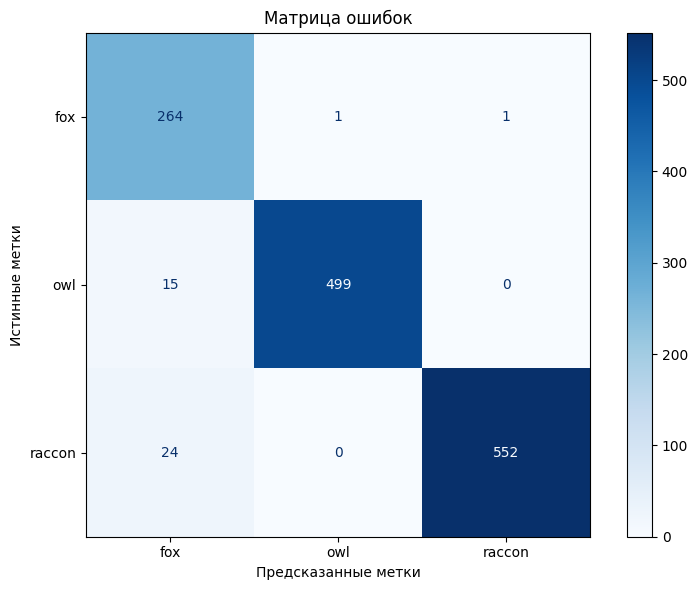

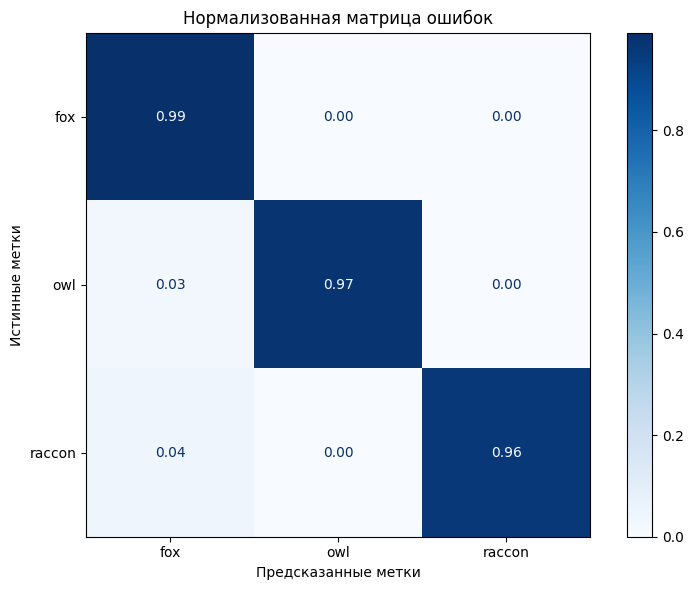


❌ Ошибки 1 и 2 рода по классам:
fox — False Positive (I род): 39, False Negative (II род): 2
owl — False Positive (I род): 1, False Negative (II род): 15
raccon — False Positive (I род): 1, False Negative (II род): 24

❌ Ошибки 1 и 2 рода по классам:
fox — False Positive (I род): 39, False Negative (II род): 2
owl — False Positive (I род): 1, False Negative (II род): 15
raccon — False Positive (I род): 1, False Negative (II род): 24

📉 Ошибки 1 и 2 рода по классам (в процентах):

Класс: fox
Ошибка 1 рода : 0.1287
Ошибка 2 рода: 0.0075

Класс: owl
Ошибка 1 рода : 0.0020
Ошибка 2 рода: 0.0292

Класс: raccon
Ошибка 1 рода : 0.0018
Ошибка 2 рода: 0.0417

📊 Метрики по классам (как в YOLO):

Класс: fox
Precision: 0.8713
Recall: 0.9925
F1 Score: 0.9279

Класс: owl
Precision: 0.9980
Recall: 0.9708
F1 Score: 0.9842

Класс: raccon
Precision: 0.9982
Recall: 0.9583
F1 Score: 0.9779

📐 AP по классам (приближённо):
fox: 0.8662
owl: 0.9799
raccon: 0.9743

📊 mAP (mean AP): 0.9401


In [11]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report

# Пути
model_path = "animal_classifier.h5"
data_dir = "data/test"
output_dir = "predict_test"
os.makedirs(output_dir, exist_ok=True)

# Классы (порядок должен соответствовать обучению)
class_names = ['fox', 'owl', 'raccon']
class_to_index = {name: idx for idx, name in enumerate(class_names)}

# Загрузка модели
model = load_model(model_path)

y_true = []
y_pred = []

# Проход по labeled_validation
for cls in class_names:
    cls_dir = os.path.join(data_dir, cls)
    for fname in os.listdir(cls_dir):
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        img_path = os.path.join(cls_dir, fname)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array_exp = np.expand_dims(img_array, axis=0)
        img_preprocessed = preprocess_input(img_array_exp)

        prediction = model.predict(img_preprocessed, verbose=0)
        predicted_index = np.argmax(prediction)
        predicted_class = class_names[predicted_index]

        y_true.append(class_to_index[cls])
        y_pred.append(predicted_index)

        # Добавим текст на изображение
        img_bgr = cv2.cvtColor(np.uint8(img_array), cv2.COLOR_RGB2BGR)
        label_text = f"Predicted: {predicted_class}"
        cv2.putText(img_bgr, label_text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)

        # Сохраняем как имя_ai.jpg
        base_name = os.path.splitext(fname)[0]
        output_path = os.path.join(output_dir, f"{base_name}_ai.jpg")
        cv2.imwrite(output_path, img_bgr)

print("✅ Все изображения обработаны и сохранены с подписями")

# Метрики
print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Матрица ошибок
cm = confusion_matrix(y_true, y_pred)
print("📌 Confusion Matrix:")
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Убедись, что порядок классов один и тот же
class_names = ['fox', 'owl', 'raccon']  # правильное написание и порядок

# 1. Обычная матрица ошибок
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', values_format='.0f')
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Нормализованная матрица ошибок
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', values_format='.2f')
plt.title("Нормализованная матрица ошибок")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.grid(False)
plt.tight_layout()
plt.show()

# 3. Ошибки I и II рода
fp = cm.sum(axis=0) - np.diag(cm)  # False Positives (ошибка I рода)
fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives (ошибка II рода)

print("\n❌ Ошибки 1 и 2 рода по классам:")
for idx, cls in enumerate(class_names):
    print(f"{cls} — False Positive (I род): {fp[idx]}, False Negative (II род): {fn[idx]}")






# Ошибки 1 и 2 рода
fp = cm.sum(axis=0) - np.diag(cm)  # False Positives
fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives

print("\n❌ Ошибки 1 и 2 рода по классам:")
for idx, cls in enumerate(class_names):
    print(f"{cls} — False Positive (I род): {fp[idx]}, False Negative (II род): {fn[idx]}")

# Ошибки I и II рода в процентах
print("\n📉 Ошибки 1 и 2 рода по классам (в процентах):")
for idx, cls in enumerate(class_names):
    total = cm[idx].sum()  # общее число истинных объектов этого класса
    fp_percent = fp[idx] / (fp[idx] + cm[idx][idx]) if (fp[idx] + cm[idx][idx]) > 0 else 0
    fn_percent = fn[idx] / total if total > 0 else 0
    print(f"\nКласс: {cls}")
    print(f"Ошибка 1 рода : {fp_percent:.4f}")
    print(f"Ошибка 2 рода: {fn_percent:.4f}")

from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

# Метки классов
labels = [class_to_index[cls] for cls in class_names]

# Precision, Recall, F1
precision_per_class = precision_score(y_true, y_pred, labels=labels, average=None)
recall_per_class = recall_score(y_true, y_pred, labels=labels, average=None)
f1_per_class = f1_score(y_true, y_pred, labels=labels, average=None)

print("\n📊 Метрики по классам (как в YOLO):")
for i, cls in enumerate(class_names):
    print(f"\nКласс: {cls}")
    print(f"Precision: {precision_per_class[i]:.4f}")
    print(f"Recall: {recall_per_class[i]:.4f}")
    print(f"F1 Score: {f1_per_class[i]:.4f}")

# AP (approximate) по классам
y_true_bin = np.eye(len(class_names))[y_true]  # one-hot
y_pred_bin = np.eye(len(class_names))[y_pred]

try:
    ap_per_class = average_precision_score(y_true_bin, y_pred_bin, average=None)
    print("\n📐 AP по классам (приближённо):")
    for i, cls in enumerate(class_names):
        print(f"{cls}: {ap_per_class[i]:.4f}")
    print(f"\n📊 mAP (mean AP): {np.mean(ap_per_class):.4f}")
except Exception as e:
    print("\n❗ Невозможно рассчитать AP: ", e)


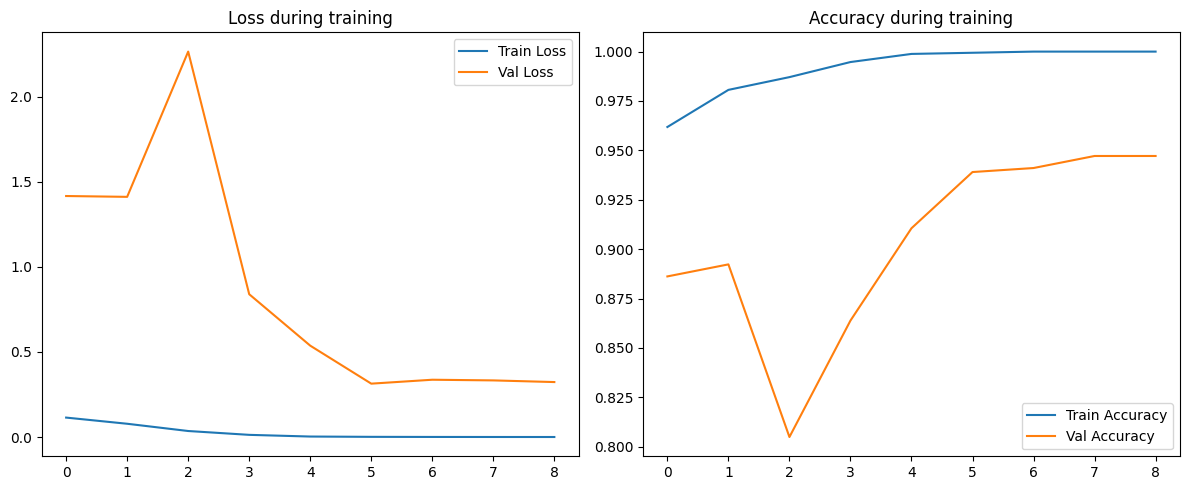

изображения классифицированы и сохранены

📊 Classification Report:
              precision    recall  f1-score   support

         fox       0.87      0.99      0.93       266
         owl       1.00      0.97      0.98       514
      raccon       1.00      0.96      0.98       576

    accuracy                           0.97      1356
   macro avg       0.96      0.97      0.96      1356
weighted avg       0.97      0.97      0.97      1356

📌 Confusion Matrix:
[[264   1   1]
 [ 15 499   0]
 [ 24   0 552]]

❌ Ошибки I и II рода по классам:
fox: FP = 39, FN = 2
owl: FP = 1, FN = 15
raccon: FP = 1, FN = 24


In [12]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import cv2
from sklearn.metrics import confusion_matrix, classification_report

# Путь к модели и валидации
validation_dir = "data/test"
model_path = "animal_classifier.h5"
model = load_model(model_path)
import pickle

with open("history.pkl", "rb") as f:
    history_data = pickle.load(f)
# Визуализация истории
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss during training')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy during training')
plt.legend()

plt.tight_layout()
plt.show()



# Классы в том же порядке, что и при обучении
class_names = ['fox', 'owl', 'raccon']
class_to_index = {name: idx for idx, name in enumerate(class_names)}

# Загружаем модель
model = load_model(model_path)

y_true = []
y_pred = []

# Рекурсивный обход всех изображений в labeled_validation
for root, _, files in os.walk(validation_dir):
    # Определим истинный класс по имени папки (если есть)
    true_label = os.path.basename(root)
    is_known_class = true_label in class_to_index

    for fname in files:
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img_path = os.path.join(root, fname)
        # Предсказание
        img = image.load_img(img_path, target_size=(224, 224))
        arr = image.img_to_array(img)
        x = preprocess_input(np.expand_dims(arr, 0))

        preds = model.predict(x, verbose=0)[0]
        pred_index = np.argmax(preds)
        pred_class = class_names[pred_index]

        # Собираем метки для метрик (пропускаем, если нет папки-класса)
        if is_known_class:
            y_true.append(class_to_index[true_label])
            y_pred.append(pred_index)

        # Наносим подпись на изображение
        img_bgr = cv2.cvtColor(np.uint8(arr), cv2.COLOR_RGB2BGR)
        text = f"{pred_class} ({preds[pred_index]:.2f})"
        cv2.putText(img_bgr, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (0, 255, 0), 2, cv2.LINE_AA)

        # Сохраняем рядом с оригиналом
        name, ext = os.path.splitext(fname)
        out_name = f"{name}_ai{ext}"
        out_path = os.path.join(root, out_name)
        cv2.imwrite(out_path, img_bgr)

print("изображения классифицированы и сохранены")

# Если есть хотя бы один истинный ярлык — выводим метрики
if y_true:
    print("\n📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred)
    print("📌 Confusion Matrix:")
    print(cm)

    # Ошибки 1 и 2 рода
    fp = cm.sum(axis=0) - np.diag(cm)  # False Positives
    fn = cm.sum(axis=1) - np.diag(cm)  # False Negatives
    print("\n❌ Ошибки I и II рода по классам:")
    for idx, cls in enumerate(class_names):
        print(f"{cls}: FP = {fp[idx]}, FN = {fn[idx]}")
else:
    print("⚠️ Не найдено изображений, размеченных по папкам fox/owl/raccoon — метрики не рассчитаны.")
